In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cities = []
k      = 50
ks     = [10, 30, 50]

with open('../txt/intl.txt', 'r') as txt_file:
    for line in txt_file:
        city = line.split(',')[0]
        cities.append(city)

In [3]:
result_1 = {}
result_2 = {}

for city in cities:
    t30s = []
    d_1s = []
    for k in ks:

        with open(f'../result/{city}_spdt_100_{k}.pkl', 'rb') as file1, \
            open(f'../result/{city}_qpdt_100_{k}.pkl', 'rb') as file2:
            spdt = pickle.load(file1)
            qpdt = pickle.load(file2)

            spt = spdt[:, 1]
            qpt = qpdt[:, 1]

            sub_time = spt - qpt

            t30 = sub_time[np.where(sub_time > 30)]

            spd = spdt[:, 0]
            qpd = qpdt[:, 0]

            sub_dist = qpd - spd

            d1  = sub_dist[np.where(sub_dist > 1000)]

            t30_p = np.round(len(t30) / len(spt) * 100, 1)
            d1__p = np.round(len(d1) / len(spd) * 100, 1)

            t30s.append(t30_p)
            d_1s.append(d1__p)
            # print(f'T30 {city} {t30_p}')
            # print(f' D1 {city} {d1__p}')

    result_1[city] = t30s
    result_2[city] = d_1s
    print(f'{city} \t {d_1s}')


manhattan 	 [55.0, 61.0, 62.0]
barcelona 	 [32.0, 36.0, 39.0]
dubai 	 [66.0, 74.0, 75.0]
berlin 	 [70.0, 77.0, 79.0]
roma 	 [85.0, 88.0, 88.0]
amsterdam 	 [60.0, 66.0, 69.0]
paris 	 [50.0, 58.0, 62.0]
hanoi 	 [95.0, 95.0, 95.0]
new delhi 	 [44.0, 54.0, 60.0]
jakarta 	 [90.0, 91.0, 91.0]


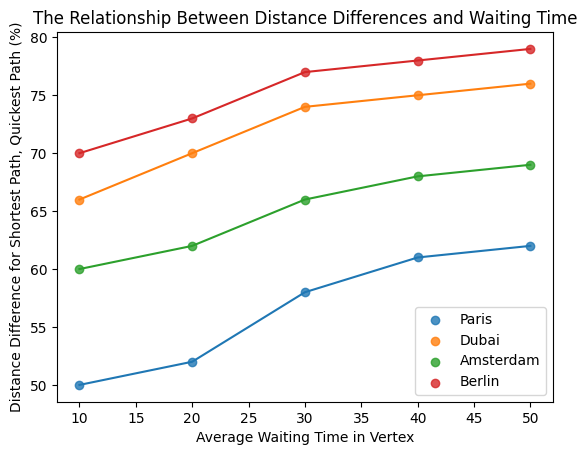

<Figure size 1000x1000 with 0 Axes>

In [4]:
result_3 = {}
result_3['Paris']     = [50.0, 52, 58.0, 61, 62.0]
result_3['Dubai']     = [66.0, 70, 74.0, 75, 76.0]
result_3['Amsterdam'] = [60.0, 62, 66.0, 68, 69.0]
result_3['Berlin']    = [70.0, 73, 77.0, 78,79.0]

kss     = [10,20, 30,40, 50]

for city in result_3:
    plt.scatter(kss, result_3[city], label=city, alpha=0.8)
    plt.plot(kss, result_3[city])

plt.legend()
plt.xlabel('Average Waiting Time in Vertex')
plt.ylabel('Distance Difference for Shortest Path, Quickest Path (%)')
plt.title('The Relationship Between Distance Differences and Waiting Time')
plt.figure(figsize=(10, 10))
plt.show()